In [1]:
# importing data libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/hotel_bookings.csv')
data_train = data.copy()

In [3]:
data.shape

(119390, 32)

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# fill pd.NaN values to np.nan

data = data.fillna(np.nan)

In [9]:
# nan values

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

nan_cols = pd.concat([total, percent], axis=1, keys=['Total', 'nan'])

nan_cols = nan_cols[nan_cols['nan'] > 0]

nan_cols

,Total,nan
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034


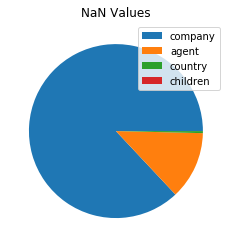

In [10]:
plt.pie(nan_cols.reset_index()['Total'])

plt.title("NaN Values")
plt.legend(labels=nan_cols.reset_index()['index'] )

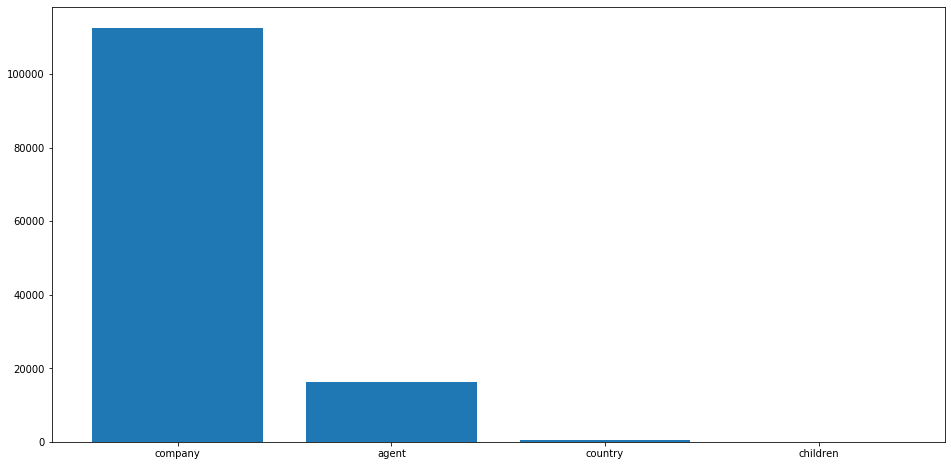

In [11]:
plt.figure(figsize=(16, 8))

plt.bar(nan_cols.index, nan_cols['Total'])

plt.show()

## Data Analysis and Visualizations:

In [12]:
# seaborn initial settings

sns.set(context='notebook', palette='Set1', style='whitegrid', rc={'figure.figsize':(16, 8)})

In [13]:
columns_will_be_removed = list()

## 0 - Correlation HeatMap:

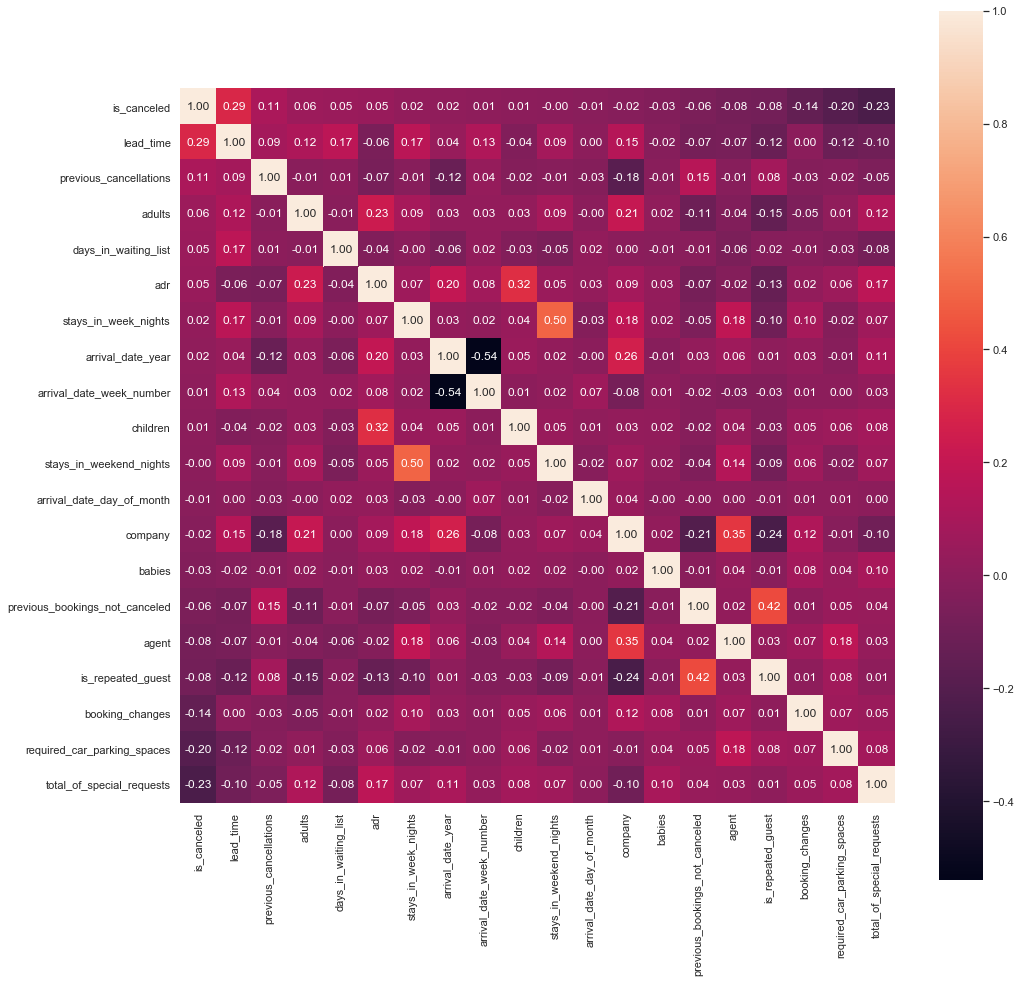

In [14]:
data_corr = data.corr()

column = 'is_canceled'
corr_cols = data.shape[1]

cols = data_corr.nlargest(corr_cols, column)[column].index
coef = data_corr.nlargest(corr_cols, column)[cols].values

plt.figure(figsize=(16, 16))

g = sns.heatmap(coef, cbar=True, annot=True, square=True, fmt='.2f', 
                yticklabels=cols.values, xticklabels=cols.values)

### 1 - hotel:
    
    - hotel name info.

In [15]:
data['hotel'].isna().sum()

0

In [16]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

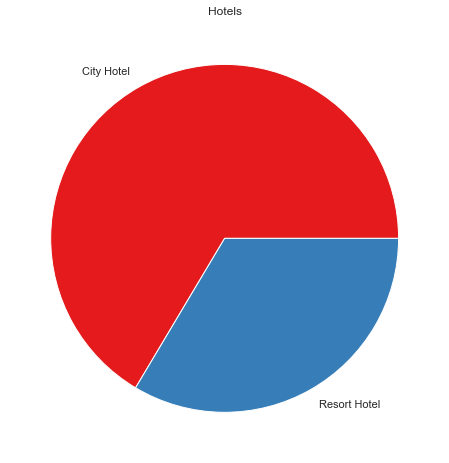

In [17]:
plt.pie(data['hotel'].value_counts().values, labels=data['hotel'].value_counts().keys())

plt.title("Hotels")
plt.show()

Text(0.5, 1.0, 'Hotels')

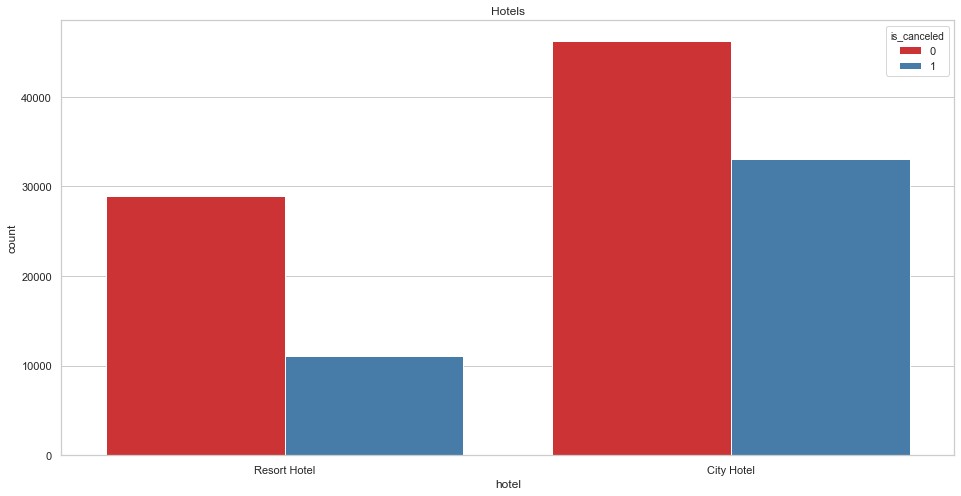

In [18]:
g = sns.countplot(x='hotel', hue='is_canceled', data=data)

g.set_title("Hotels")

In [19]:
data.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

* City hotel has more bookings and canceled bookings. 

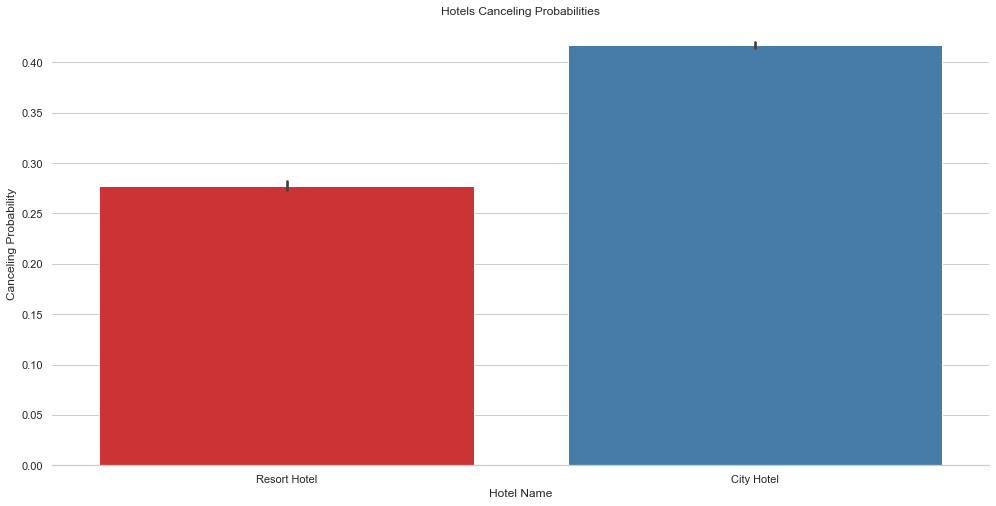

In [20]:
g = sns.catplot(x='hotel', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True) # removes axis line. Here removes y axis line.

g.set(xlabel='Hotel Name', ylabel='Canceling Probability', title="Hotels Canceling Probabilities")

* If the booking belongs to City Hotel it is more likely be canceled. 

In [21]:
## convert hotel names to dummy variables.

data_changed = pd.get_dummies(data_train, columns=['hotel'], prefix='', prefix_sep='', drop_first=True)

In [22]:
data_changed.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


### 2 - lead_time:

    - lead time each customers in mins.

In [23]:
data['lead_time'].isna().sum()

0

In [24]:
data['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

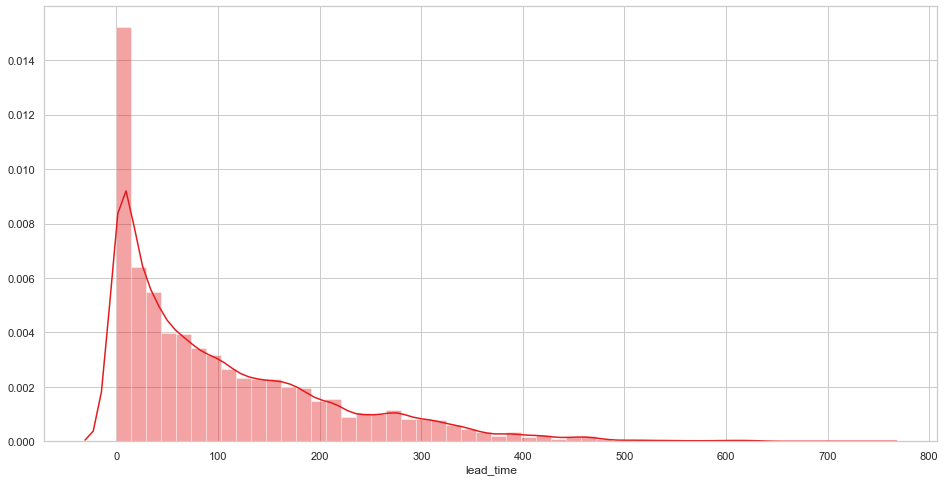

In [25]:
g = sns.distplot(a=data['lead_time'], label='lead_time_distribution')

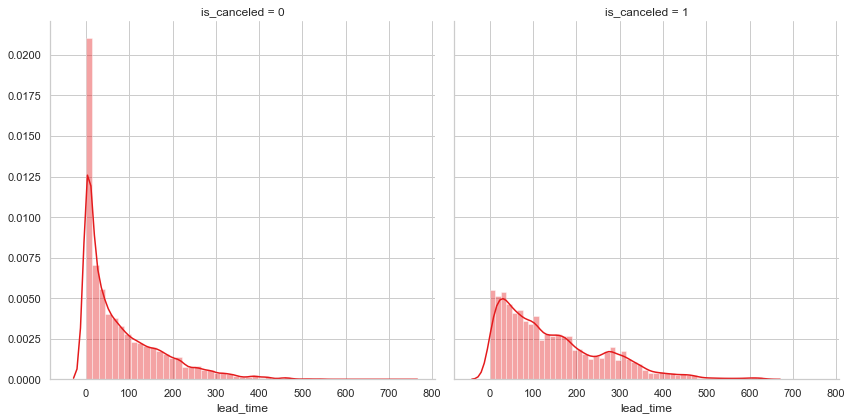

In [26]:
# lead_time vs canceled

g = sns.FacetGrid(data, col='is_canceled', height=6)
g = g.map(sns.distplot, 'lead_time')


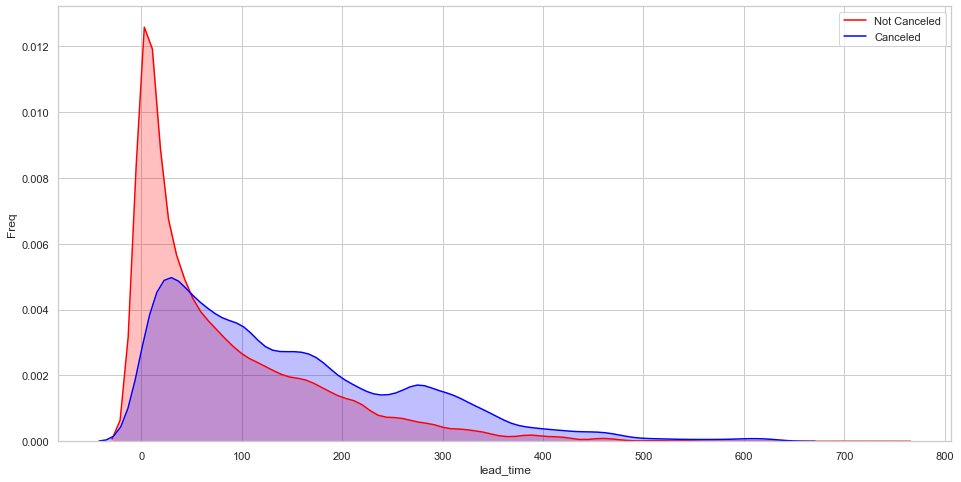

In [27]:
# lead_time dist vs is_canceled

g = sns.kdeplot(data['lead_time'][data['is_canceled'] == 0],
               color='Red', shade=True)

g = sns.kdeplot(data['lead_time'][data['is_canceled'] == 1],
               color='Blue', shade=True)

g.set_xlabel('lead_time')
g.set_ylabel('Freq')

g = g.legend(['Not Canceled', 'Canceled'])

In [28]:
data['lead_time'].min(), data['lead_time'].mean(), data['lead_time'].max()

(0, 104.01141636652986, 737)

In [29]:
data_changed['lead_time_hour'] = data['lead_time'] // 60

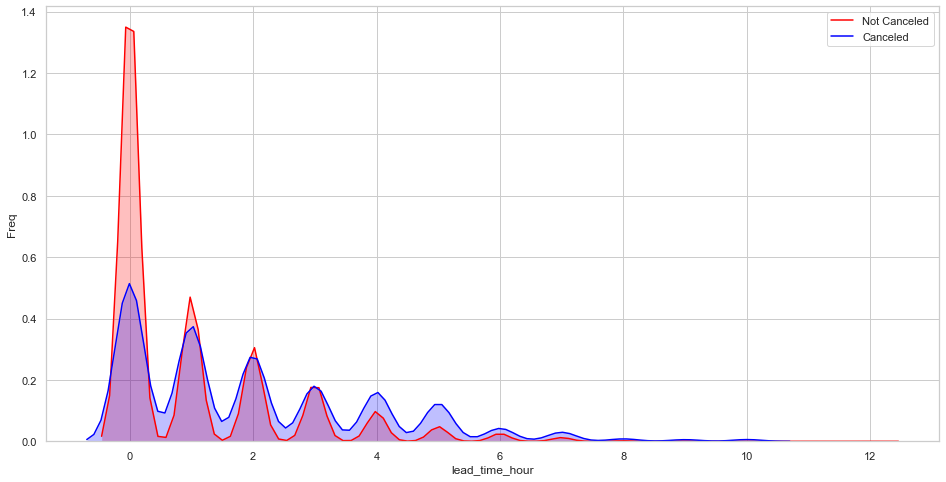

In [30]:
# after converting mins to hours

g = sns.kdeplot(data_changed['lead_time_hour'][data_changed['is_canceled'] == 0],
               color='Red', shade=True)

g = sns.kdeplot(data_changed['lead_time_hour'][data_changed['is_canceled'] == 1],
               color='Blue', shade=True)

g.set_xlabel('lead_time_hour')
g.set_ylabel('Freq')

g = g.legend(['Not Canceled', 'Canceled'])

In [31]:
data_changed['lead_time_hour'].value_counts()

0     55240
1     23201
2     15987
3     10095
4      6887
5      4537
6      1794
7      1098
8       245
9       159
10      145
12        1
11        1
Name: lead_time_hour, dtype: int64

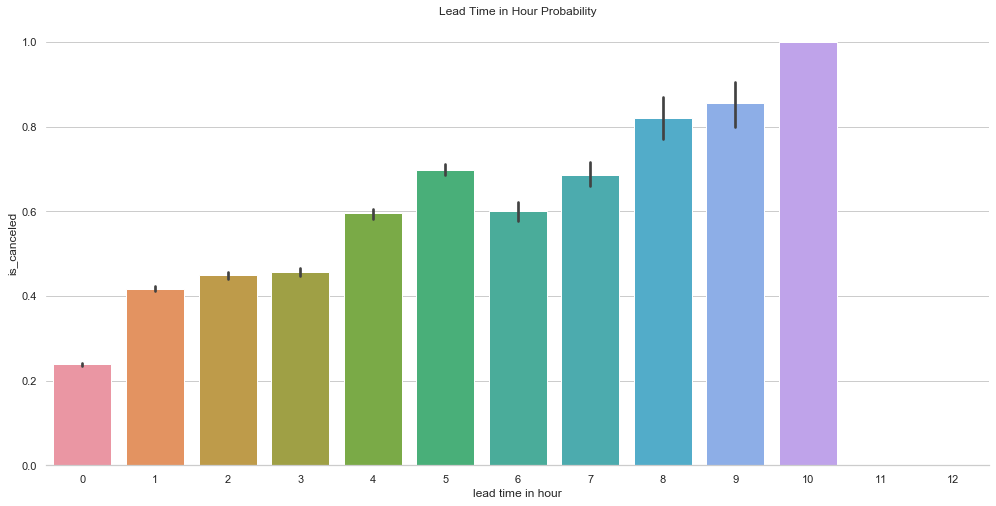

In [32]:
g = sns.catplot(x='lead_time_hour', y='is_canceled', data=data_changed, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(xlabel='lead time in hour', ylabel='is_canceled', title="Lead Time in Hour Probability")

* Clearly we can see that increasing lead_time increases canceling probability.

In [33]:
columns_will_be_removed.append('lead_time')

### 3 - arrival_date_year:

In [34]:
data['arrival_date_year'].isna().sum()

0

In [35]:
data['arrival_date_year'].describe()

count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64

In [36]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [37]:
data['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Years')

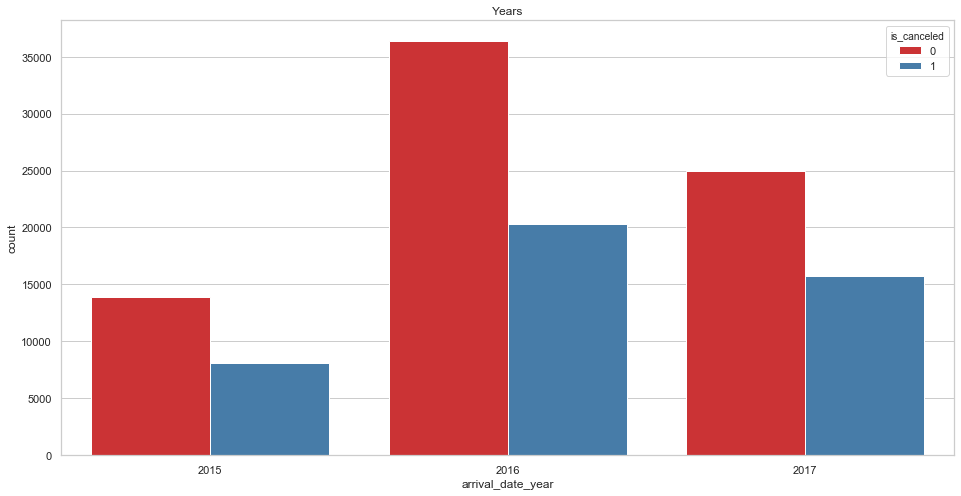

In [38]:
g = sns.countplot(x='arrival_date_year', hue='is_canceled', data=data)

g.set_title("Years")

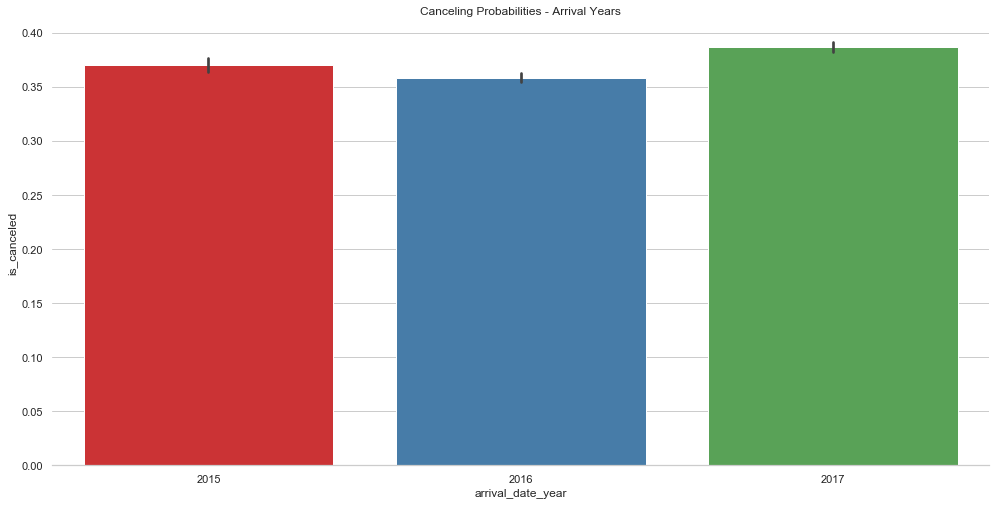

In [39]:
g = sns.catplot(x='arrival_date_year', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Years')

- 2015 - 2016 - 2017 have similar canceling probabilities.

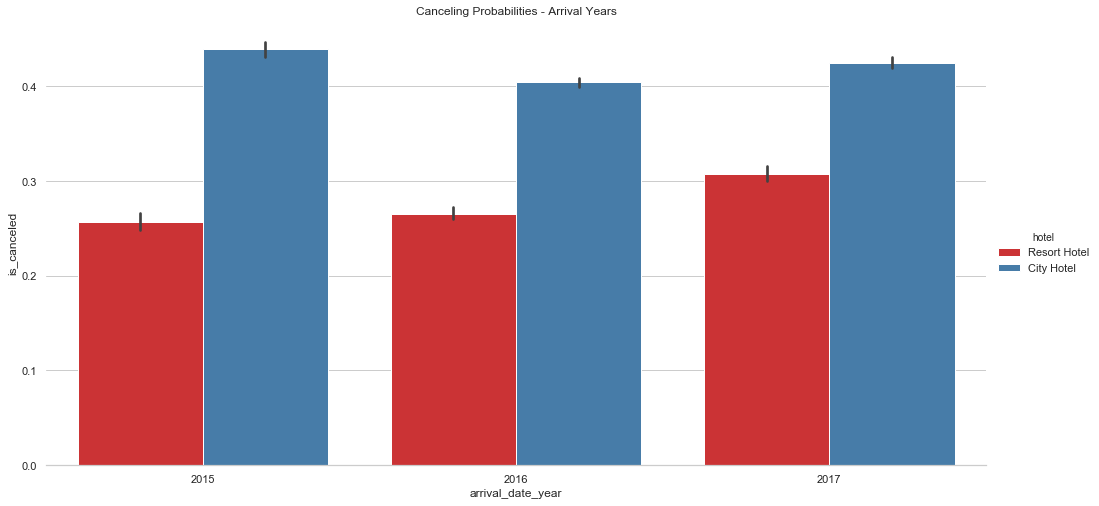

In [40]:
g = sns.catplot(x='arrival_date_year', y='is_canceled', hue='hotel', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Years')

- In the each year canceling probability higher for Ciy Hotel.

In [41]:
# get dummy data for years.

data_changed = pd.get_dummies(data, columns=['arrival_date_year'])

In [42]:
data_changed.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,0,0


### 4 - arrival_date_week_number:

In [43]:
data['arrival_date_week_number'].isna().sum()

0

In [44]:
data['arrival_date_week_number'].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [45]:
data['arrival_date_week_number'].value_counts()[:10]

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
Name: arrival_date_week_number, dtype: int64

In [46]:
# we have info for arrival month that's why we can use week info to detect which week in a month they arrived.

In [47]:
data['arrival_date_weekth_in_month'] = data['arrival_date_week_number'] % 4

In [48]:
data['arrival_date_weekth_in_month'].describe()

count    119390.000000
mean          1.487780
std           1.102666
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: arrival_date_weekth_in_month, dtype: float64

In [49]:
data['arrival_date_weekth_in_month'].value_counts(sort=False)

0    28907
1    32099
2    29625
3    28759
Name: arrival_date_weekth_in_month, dtype: int64

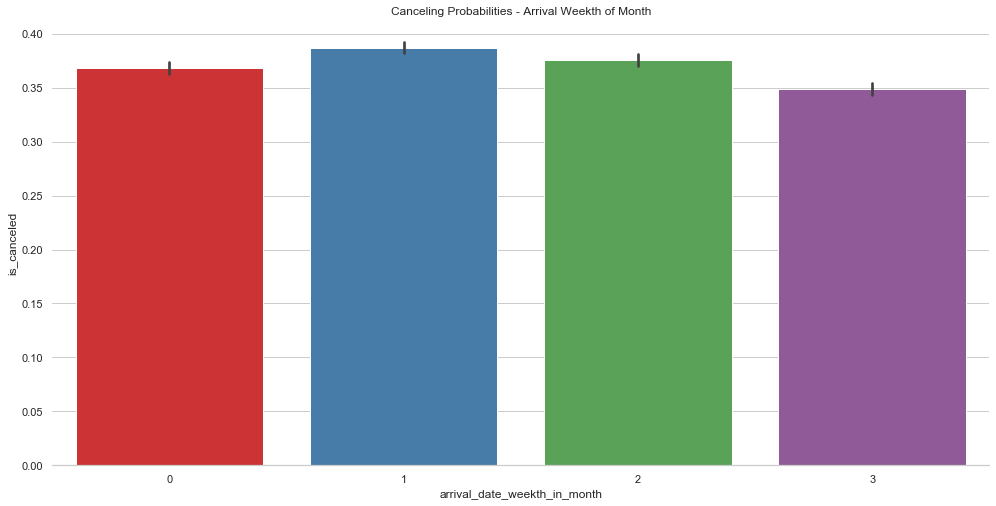

In [50]:
g = sns.catplot(x='arrival_date_weekth_in_month', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Weekth of Month')

-  Canceling probability is high for weeks 1st and 2nd.

In [51]:
data_changed = pd.get_dummies(data, columns=['arrival_date_weekth_in_month'])

In [52]:
data_changed.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_weekth_in_month_0,arrival_date_weekth_in_month_1,arrival_date_weekth_in_month_2,arrival_date_weekth_in_month_3
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,0,0,1


### 5 - arrival_date_month:

In [53]:
data['arrival_date_month'].isna().sum()

0

In [54]:
data['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

In [55]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

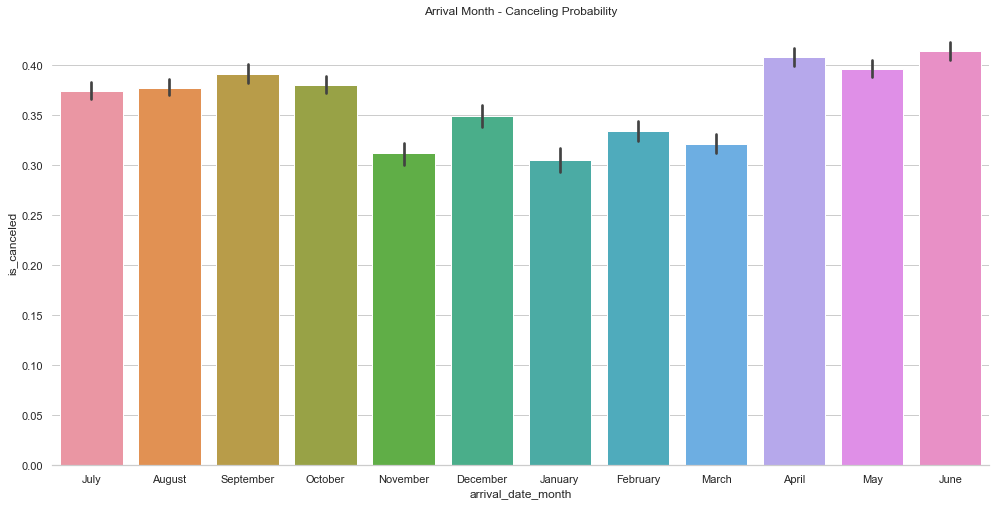

In [56]:
g = sns.catplot(x='arrival_date_month', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Month - Canceling Probability')

- We have higher canceling probabilities for summer.

In [57]:
# we may try to generate season data.

In [58]:
def month_to_season(month):
    
    if month in ['June', 'July', 'August']:
        return "summer"
    elif month in ['March', 'April', 'May']:
        return "spring"
    elif month in ['October', 'November', 'September']:
        return "autumn"
    else:
        return "winter"

In [59]:
data['seasons'] = data['arrival_date_month'].apply(month_to_season)

In [60]:
data['seasons'].value_counts()

summer    37477
spring    32674
autumn    28462
winter    20777
Name: seasons, dtype: int64

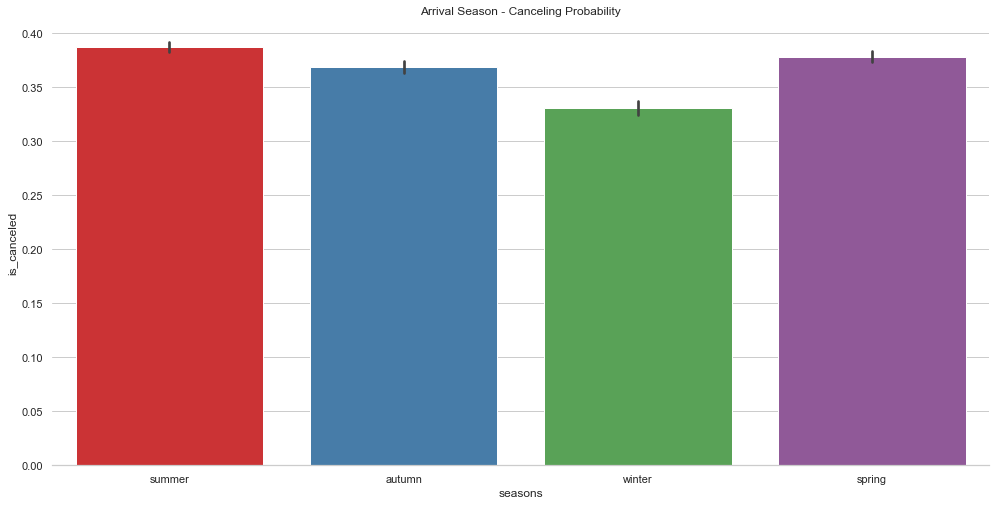

In [61]:
g = sns.catplot(x='seasons', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Season - Canceling Probability')

- Lowest Cancel Probability is for winter season. 

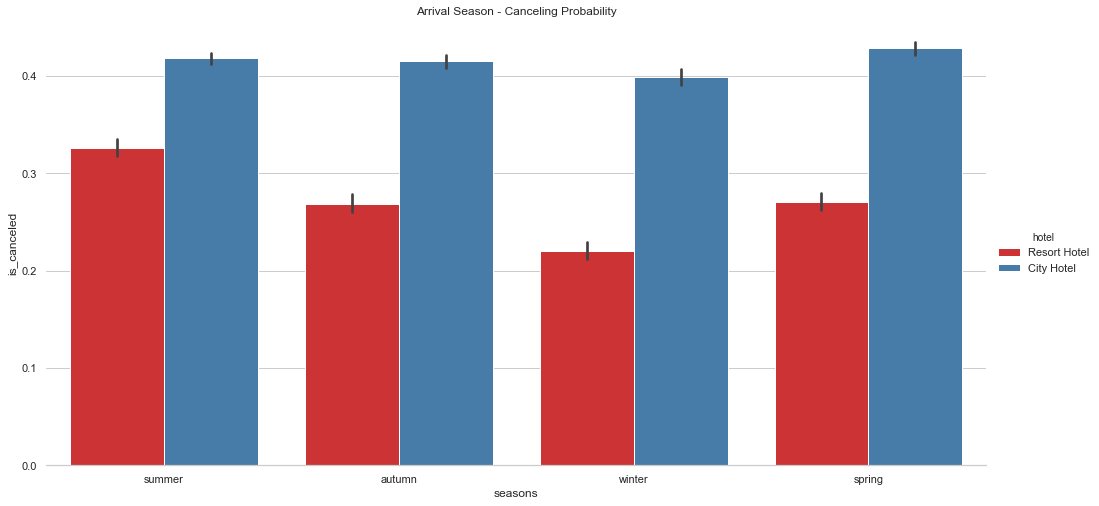

In [62]:
g = sns.catplot(x='seasons', y='is_canceled', hue='hotel', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Season - Canceling Probability')

In [63]:
data.groupby(['hotel', 'seasons'])['is_canceled'].value_counts(normalize=True)

hotel         seasons  is_canceled
City Hotel    autumn   0              0.584805
                       1              0.415195
              spring   0              0.571313
                       1              0.428687
              summer   0              0.581975
                       1              0.418025
              winter   0              0.600795
                       1              0.399205
Resort Hotel  autumn   0              0.731319
                       1              0.268681
              spring   0              0.729056
                       1              0.270944
              summer   0              0.673913
                       1              0.326087
              winter   0              0.779582
                       1              0.220418
Name: is_canceled, dtype: float64

In [64]:
data_changed = pd.get_dummies(data, columns=['seasons', 'arrival_date_month'])

In [65]:
data_changed.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,1,0,0,0,0,0,0


### 6 - arrival_date_day_of_month:

In [66]:
data['arrival_date_day_of_month'].isna().sum()

0

In [67]:
data['arrival_date_day_of_month'].describe()

count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64

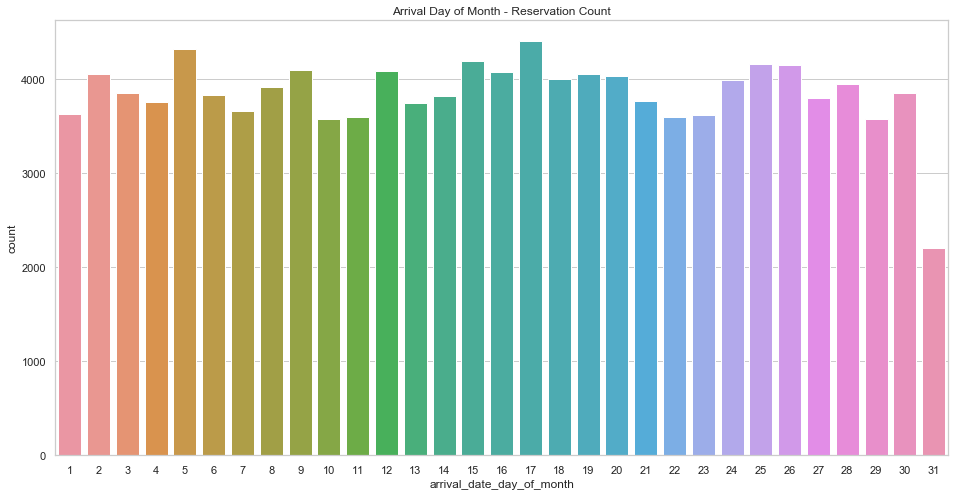

In [68]:
g = sns.countplot(x='arrival_date_day_of_month', data=data)

g.set(title='Arrival Day of Month - Reservation Count')

plt.show(g)

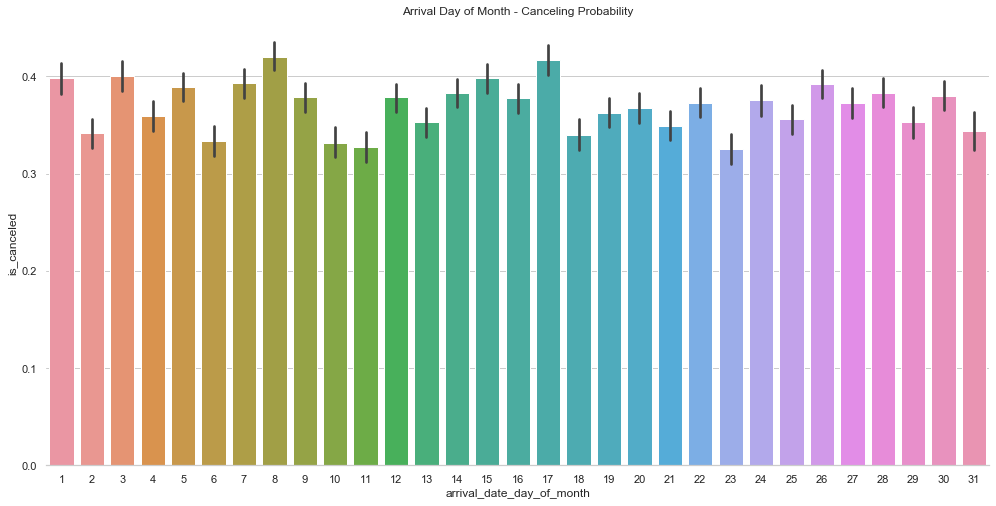

In [69]:
g = sns.catplot(x='arrival_date_day_of_month', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Day of Month - Canceling Probability')

plt.show(g)

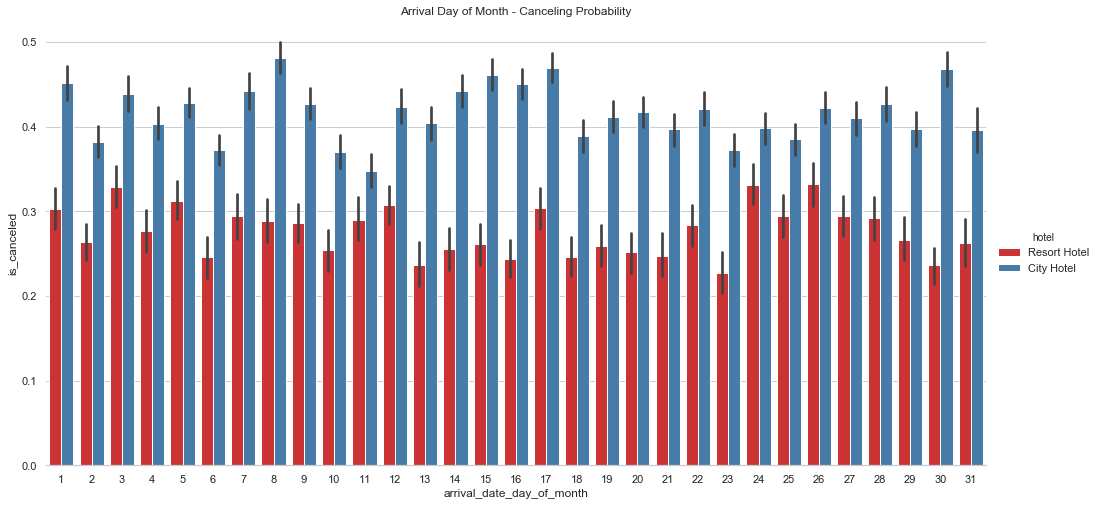

In [70]:
g = sns.catplot(x='arrival_date_day_of_month', y='is_canceled', hue='hotel', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Day of Month - Canceling Probability')

plt.show(g)

In [71]:
"10".ljust(10)

'10        '

In [72]:
# we will convert day of month to day of week

def date_to_day_of_week(row):
    
    import datetime
    from IPython.display import clear_output
    
    if (row['index'] % 1193 == 0 and row['index'] != 0):
        clear_output(wait=True)
        print("#" * (row['index'] // 1193), end="")
        print(str(row['index'] // 1193).rjust(110 - row['index'] // 1193))
    
    months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
              'October', 'November', 'December']
    
    year = row['arrival_date_year']
    month = months.index(row['arrival_date_month'])
    day = row['arrival_date_day_of_month']
    
    arrival_date = datetime.date(year, month, day)
    
    # row['arrival_date_day_of_week'] = arrival_date.strftime("%A")
    
    return arrival_date.strftime("%A")

In [73]:
data['arrival_date_day_of_week'] = np.nan

In [74]:
data_changed['arrival_date_day_of_week'] = data.reset_index().apply(date_to_day_of_week, axis=1)

####################################################################################################       100


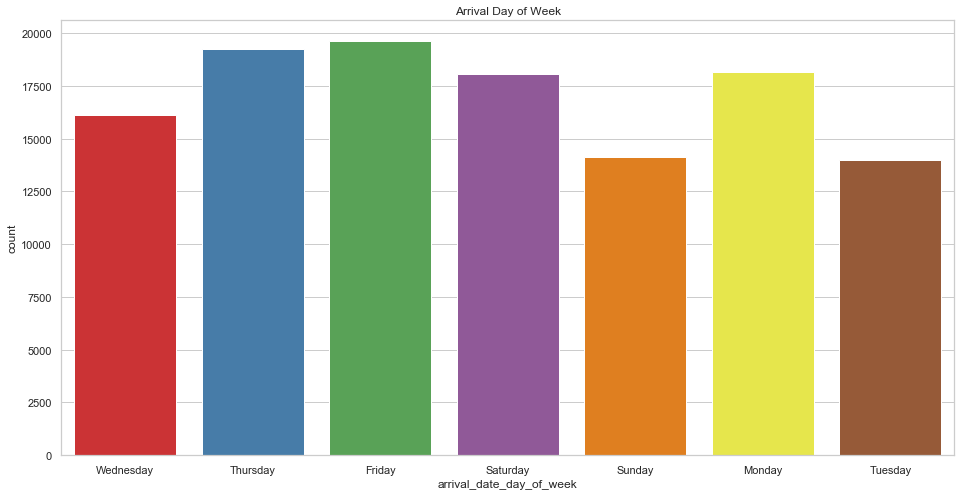

In [75]:
g = sns.countplot(x='arrival_date_day_of_week', data=data_changed)

g.set(title='Arrival Day of Week')
plt.show(g)

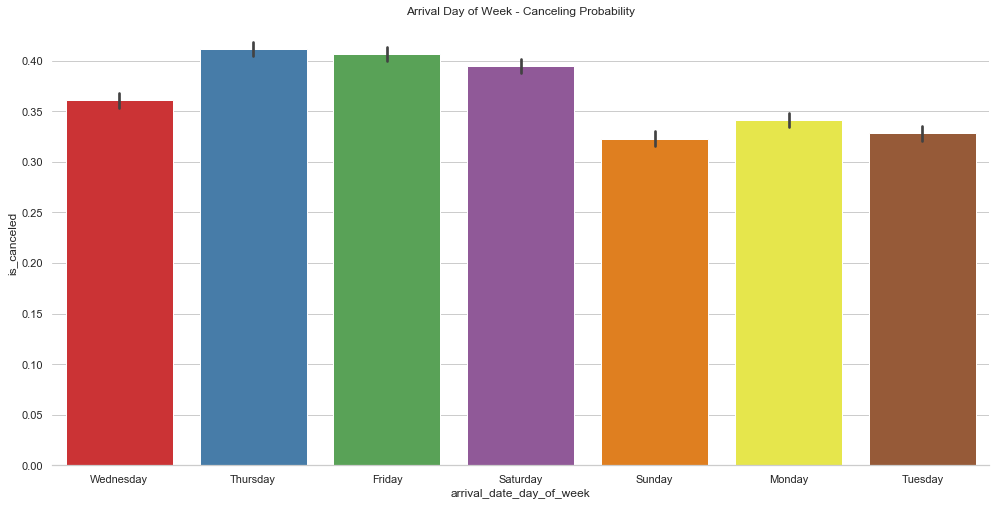

In [76]:
g = sns.catplot(x='arrival_date_day_of_week', y='is_canceled', data=data_changed, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Day of Week - Canceling Probability')

plt.show(g)

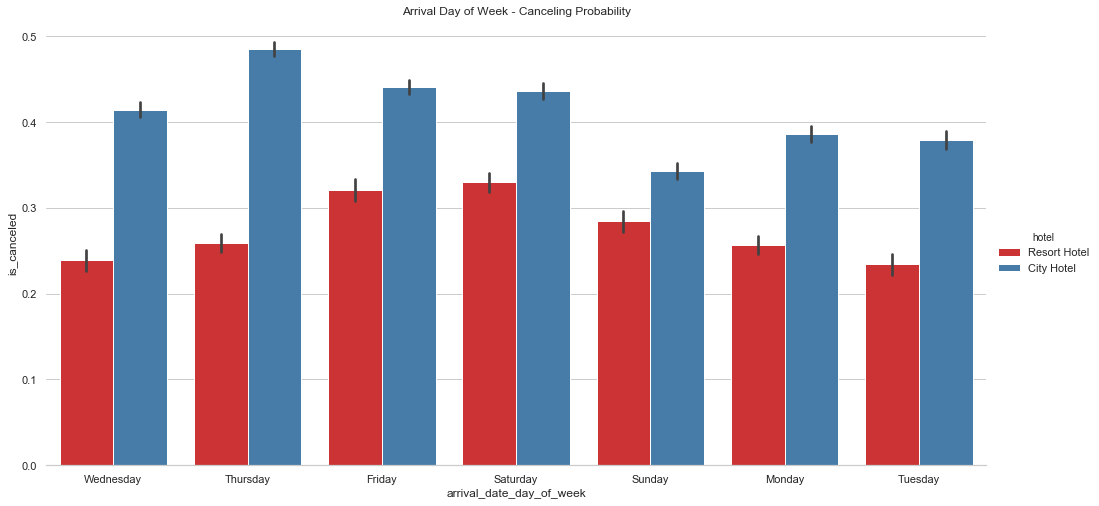

In [77]:
g = sns.catplot(x='arrival_date_day_of_week', y='is_canceled', hue='hotel', data=data_changed, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Day of Week - Canceling Probability')

plt.show(g)

In [78]:
# we will drop the column of day_of_month

columns_will_be_removed.append('arrival_date_day_of_month')

In [79]:
data_changed = pd.get_dummies(data_changed, columns=['arrival_date_day_of_week'])

In [80]:
data_changed.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_week_Friday,arrival_date_day_of_week_Monday,arrival_date_day_of_week_Saturday,arrival_date_day_of_week_Sunday,arrival_date_day_of_week_Thursday,arrival_date_day_of_week_Tuesday,arrival_date_day_of_week_Wednesday
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,0,0,1
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,0,0,1
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,1


### 7 - stays_in_weekend_nights:

- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

In [81]:
data['stays_in_weekend_nights'].isna().sum()

0

In [82]:
data['stays_in_weekend_nights'].describe()

count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64

In [83]:
sorted(data['stays_in_weekend_nights'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 18, 19]

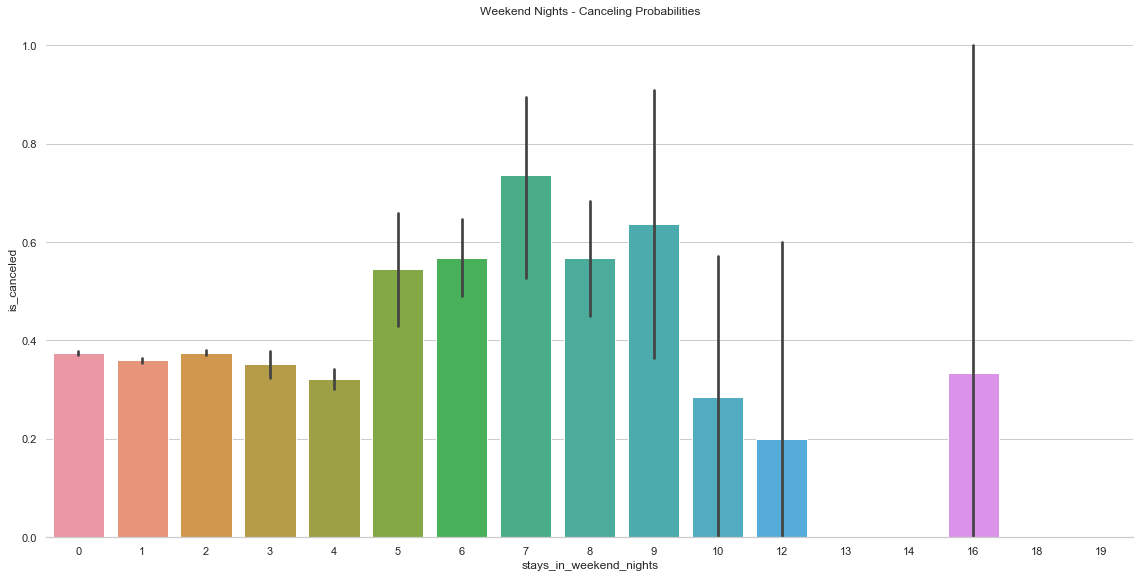

In [84]:
g = sns.catplot(x='stays_in_weekend_nights', y='is_canceled', data=data, kind='bar', height=8, aspect=2)

g.despine(left=True)

g.set(title='Weekend Nights - Canceling Probabilities')

plt.show(g)

### 8 - stays_in_week_nights:

 - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

In [85]:
data['stays_in_week_nights'].isna().sum()

0

In [86]:
data['stays_in_week_nights'].describe()

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

In [87]:
data['stays_in_week_nights'].value_counts(normalize=True)

2     0.282134
1     0.253874
3     0.186431
5     0.092780
4     0.080099
0     0.064034
6     0.012555
10    0.008677
7     0.008619
8     0.005495
9     0.001935
15    0.000712
11    0.000469
19    0.000369
12    0.000352
20    0.000343
14    0.000293
13    0.000226
16    0.000134
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
42    0.000008
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
50    0.000008
Name: stays_in_week_nights, dtype: float64

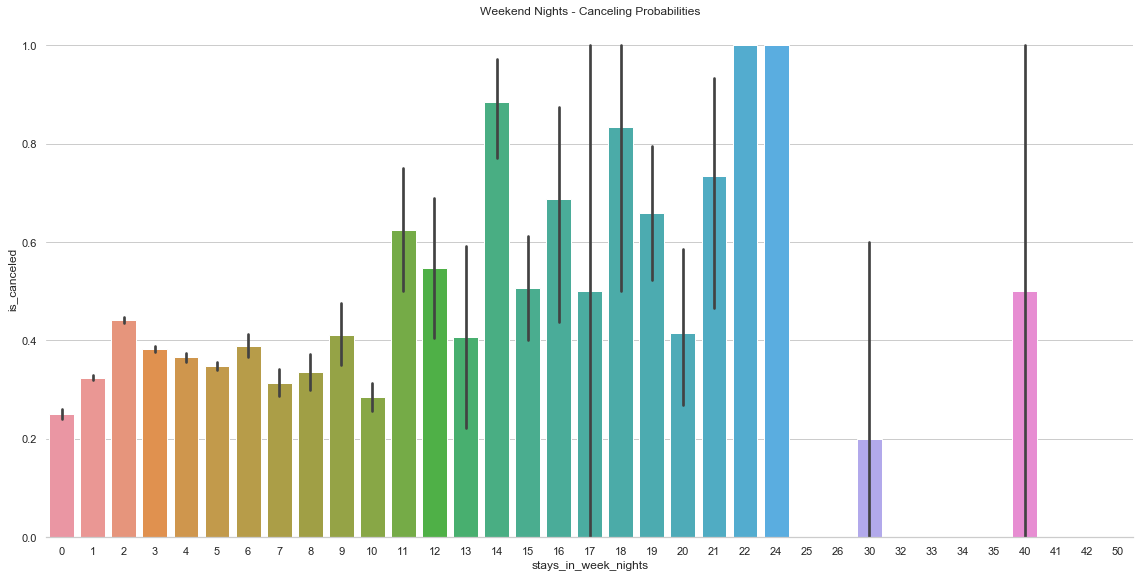

In [88]:
g = sns.catplot(x='stays_in_week_nights', y='is_canceled', data=data, kind='bar', height=8, aspect=2)

g.despine(left=True)

g.set(title='Weekend Nights - Canceling Probabilities')

plt.show(g)

In [89]:
# we may check the total stay time.

data_changed['stays_total'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [90]:
data_changed['stays_total'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays_total, dtype: float64

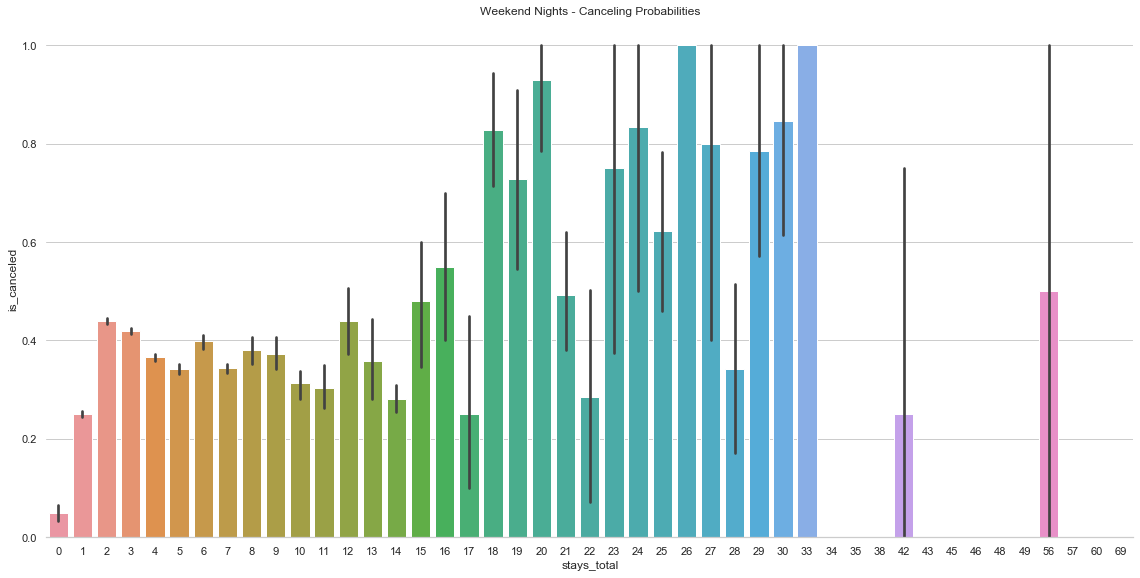

In [91]:
g = sns.catplot(x='stays_total', y='is_canceled', data=data_changed, kind='bar', height=8, aspect=2)

g.despine(left=True)

g.set(title='Weekend Nights - Canceling Probabilities')

plt.show(g)

### 9 - Adults:


- Number of adults

In [92]:
data['adults'].isna().sum()

0

In [93]:
data['adults'].describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [94]:
data['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [95]:
data['adults'].value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
27    0.000017
20    0.000017
5     0.000017
55    0.000008
50    0.000008
40    0.000008
10    0.000008
6     0.000008
Name: adults, dtype: float64

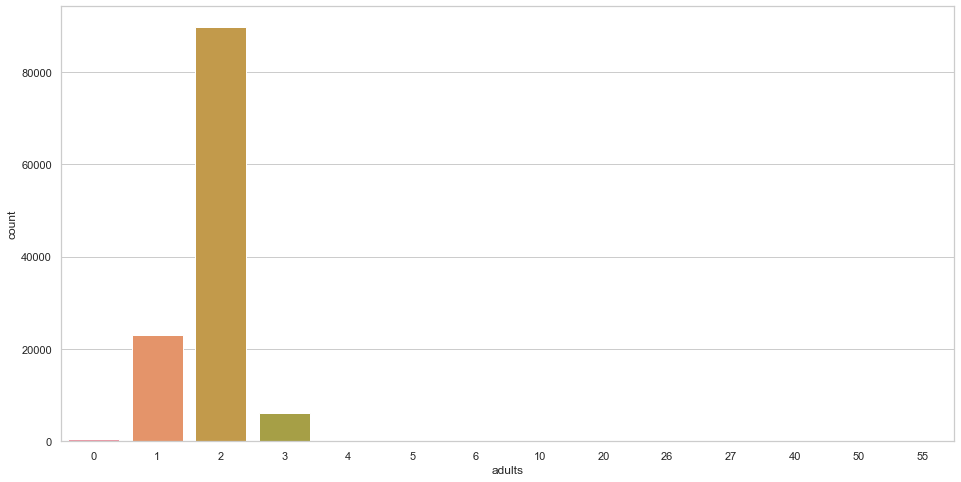

In [96]:
g = sns.countplot(x='adults', data=data)

plt.show(g)

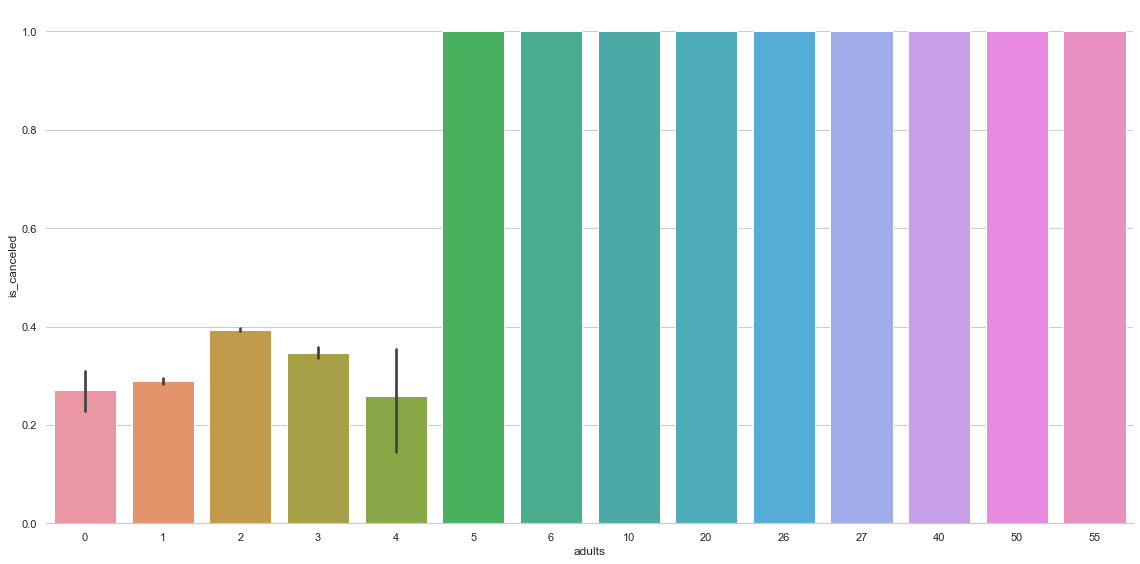

In [97]:
g = sns.catplot(x='adults', y='is_canceled', data=data, kind='bar', height=8, aspect=2)

g.despine(left=True)

plt.show(g)

### 10 - Children:

- Number of children

In [98]:
data['children'].isna().sum()

4

In [99]:
data[data['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_weekth_in_month,seasons,arrival_date_day_of_week
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,0,Transient-Party,12.0,0,1,Canceled,2015-08-01,0,summer,NaN
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,0,Transient-Party,12.0,0,1,Canceled,2015-08-04,0,summer,NaN
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,0,Transient-Party,18.0,0,2,Canceled,2015-08-04,0,summer,NaN
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,0,Transient-Party,76.5,0,1,Canceled,2015-08-09,1,summer,NaN


### Here we can follow several ways to handle nan values for children:

    - Create an algorithm and estimate.
    
    - Fill with mode.
    
    - Fill with mean.

In [100]:
# we chose the mode.

data_changed['children'] = data['children'].fillna(data['children'].mode)

In [101]:
data_changed['children'].isna().sum()

0

### 11 - Babies:

- Number of babies

In [102]:
data['babies'].isna().sum()

0

In [103]:
data['babies'].describe()

count    119390.000000
mean          0.007949
std           0.097436
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: babies, dtype: float64

In [104]:
data['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [105]:
data['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

- 9 and 10 babies are seems to be outliars

In [106]:
data[data['babies'] == 9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_weekth_in_month,seasons,arrival_date_day_of_week
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,0,Transient-Party,95.0,0,0,Check-Out,2015-10-14,2,autumn,NaN


In [107]:
data[data['babies'] == 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_weekth_in_month,seasons,arrival_date_day_of_week
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,0,Transient,84.45,0,1,Check-Out,2016-01-14,3,winter,NaN


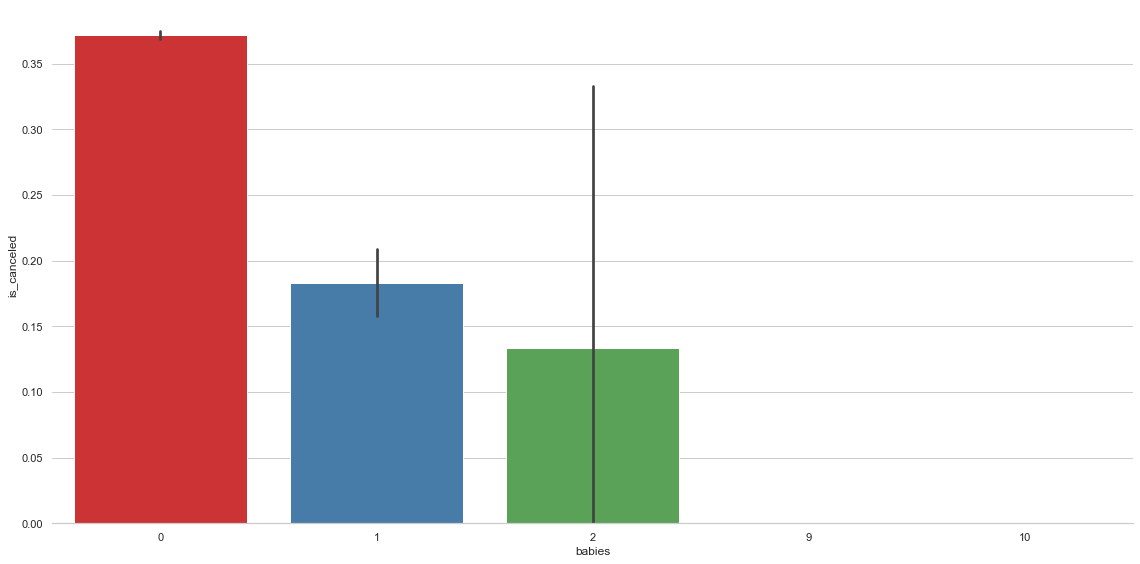

In [108]:
g = sns.catplot(x='babies', y='is_canceled', data=data, kind='bar', height=8, aspect=2)

g.despine(left=True)

plt.show(g)